In [198]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import tifffile

green = '#67C478'
purple = '#AAAADD'
blue = '#66CCDD'
orange = '#E89377'

sns.set_theme(style='darkgrid')

In [12]:
data_path = pathlib.Path('/Users/asa.barthmaron/Documents/microscope_demo/Perkin Elmer Demo Images/Neumora CLS')
experiments = [x.name for x in data_path.glob('*Measurement*')]

for exp in experiments:
    img_path = data_path / exp / 'Images'

    img_list = [p.name[:9] for p in img_path.glob('*.tiff')]
    for site in set(img_list):
        
        tmp_img_names = [p.name for p in img_path.glob(site + '*' + 'ch1' + '*' + '.tiff')]
        tmp_img = skimage.io.imread(img_path / tmp_img_names[0])
        img_stack = np.zeros((len(tmp_img_names), 2, tmp_img.shape[0], tmp_img.shape[1]), dtype='uint16')

        for i_ch, ch in enumerate(['ch1', 'ch2']):
            site_imgs = [p.name for p in img_path.glob(site + '*' + ch + '*' + '.tiff')]
            site_imgs = np.sort(site_imgs)

            # img_stack = []
            for i_img, img_name in enumerate(site_imgs):
                img_stack[i_img, i_ch, :,:] = skimage.io.imread(img_path / img_name)
                
        
        stack_dir = img_path.parent / 'stacks'
        mip_dir = img_path.parent / 'MIPs'
        if not stack_dir.exists():
            stack_dir.mkdir
        if not mip_dir.exists():
            mip_dir.mkdir

        tifffile.imwrite(stack_dir / (site + '.tiff'), img_stack, metadata={'axes': 'ZCYX', 'mode' : 'composite'}, imagej=True, compression=None, photometric='minisblack', dtype='uint16')
        tifffile.imwrite(mip_dir / (site + '.tiff'), img_stack.max(axis=0), metadata={'axes': 'CYX', 'mode' : 'composite'}, imagej=True, compression=None, photometric='minisblack', dtype='uint16')

In [13]:
data_path = pathlib.Path('/Users/asa.barthmaron/Documents/microscope_demo/Molecular Devices Demo Images')
exp = 'DIV14 MAP2 2ch_Plate_10377'
img_path = data_path / exp / 'TimePoint_1'

In [24]:
data_path = pathlib.Path('/Users/asa.barthmaron/Documents/microscope_demo/Molecular Devices Demo Images')
experiments = [x.name for x in data_path.glob('*Plate*')]

for exp in experiments:
    img_path = data_path / exp / 'TimePoint_1'

    img_list = [p.name[:-6] for p in img_path.glob('*.TIF')]
    for site in set(img_list):
        
        tmp_img_names = [p.name for p in img_path.glob(site + '*' + 'w1' + '*' + '.TIF')]
        tmp_img = skimage.io.imread(img_path / tmp_img_names[0])
        img_stack = np.zeros((len(tmp_img_names), 2, tmp_img.shape[0], tmp_img.shape[1]), dtype='uint16')

        for i_ch, ch in enumerate(['w1', 'w2']):
            site_imgs = [p.name for p in img_path.glob(site + '*' + ch + '*' + '.TIF')]
            site_imgs = np.sort(site_imgs)

            # img_stack = []
            for i_img, img_name in enumerate(site_imgs):
                img_stack[i_img, i_ch, :,:] = skimage.io.imread(img_path / img_name)
                
        
        stack_dir = img_path.parent / 'stacks'
        mip_dir = img_path.parent / 'MIPs'
        if not stack_dir.exists():
            stack_dir.mkdir
        if not mip_dir.exists():
            mip_dir.mkdir

        tifffile.imwrite(stack_dir / (site + '.tiff'), img_stack, metadata={'axes': 'ZCYX', 'mode' : 'composite'}, imagej=True, compression=None, photometric='minisblack', dtype='uint16')
        tifffile.imwrite(mip_dir / (site + '.tiff'), img_stack.max(axis=0), metadata={'axes': 'CYX', 'mode' : 'composite'}, imagej=True, compression=None, photometric='minisblack', dtype='uint16')

In [33]:
img = skimage.io.imread('/Users/asa.barthmaron/Documents/microscope_demo/2022-11-14_MD_Tuj1_DIV14.tif')
new_img = img.reshape(12,2,1024,2,1024,2)
new_img = new_img.mean(axis=(3,5)).astype('uint16')
# skimage.io.imsave('~/Documents/microscope_demo/' + 'tmp.tif', new_img)
tifffile.imwrite('/Users/asa.barthmaron/Documents/microscope_demo/2022-11-14_MD_Tuj1_DIV14_binned.tif',
    new_img, metadata={'axes': 'ZCYX', 'mode' : 'composite'}, imagej=True, compression=None, photometric='minisblack', dtype='uint16')

In [97]:
# md = skimage.io.imread('/Users/asa.barthmaron/Documents/microscope_demo/adjusted/2022-11-14_MD_Tuj1_DIV14_binned.tif')
# px = skimage.io.imread('/Users/asa.barthmaron/Documents/microscope_demo/adjusted/2022-11-14_PE_Phenix_Measurement4_Tuj1_DIV14_binned.tif')
# cls = skimage.io.imread('/Users/asa.barthmaron/Documents/microscope_demo/adjusted/2022-11-14_PE_CLS_Tuj1_DIV14.tif')

md = skimage.io.imread('/Users/asa.barthmaron/Documents/microscope_demo/adjusted/2022-11-14_MD_Tuj1_DIV14_binned-0024.tif')
px = skimage.io.imread('/Users/asa.barthmaron/Documents/microscope_demo/adjusted/2022-11-14_PE_Phenix_Measurement4_Tuj1_DIV14_binned-0020.tif')
cls = skimage.io.imread('/Users/asa.barthmaron/Documents/microscope_demo/adjusted/2022-11-14_PE_CLS_Tuj1_DIV14-0014.tif')

(0.0, 1e-05)

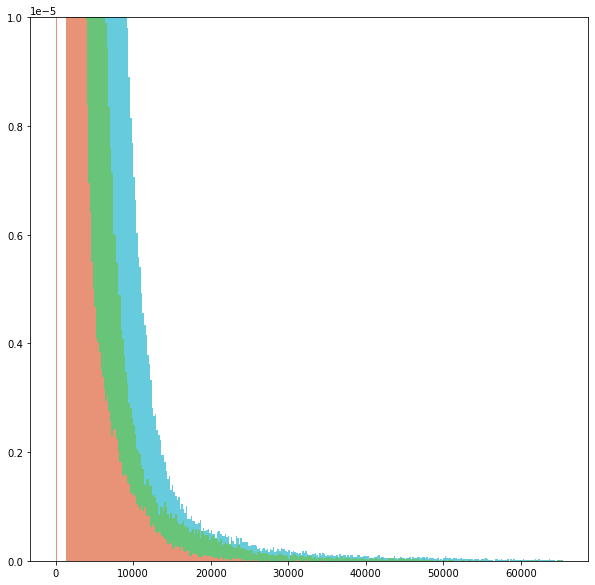

In [130]:
thresh_imgs = cls
# thresh_imgs[thresh_imgs < 500] = 0
a = plt.hist(cls[:,:].flatten(), bins = np.arange(0,65500,200), density=True, color=blue)
a = plt.hist(px[:,:].flatten(), bins = np.arange(0,65500,200), density=True, color=green)
a = plt.hist(md[:,:].flatten(), bins = np.arange(0,65500,200), density=True, color=orange)
# plt.show()
# plt.ylim([0, 0.5e4])
plt.ylim([0, 1e-5])
# plt.xlim([0, 1e3])

In [116]:
md = skimage.io.imread('/Users/asa.barthmaron/Documents/microscope_demo/adjusted/masked/2022-11-14_MD_Tuj1_DIV14_binned-0024.tiff')
px = skimage.io.imread('/Users/asa.barthmaron/Documents/microscope_demo/adjusted/masked/2022-11-14_PE_Phenix_Measurement4_Tuj1_DIV14_binned-0020.tiff')
cls = skimage.io.imread('/Users/asa.barthmaron/Documents/microscope_demo/adjusted/masked/2022-11-14_PE_CLS_Tuj1_DIV14-0014.tiff')

TypeError: _delete_dispatcher() missing 1 required positional argument: 'obj'

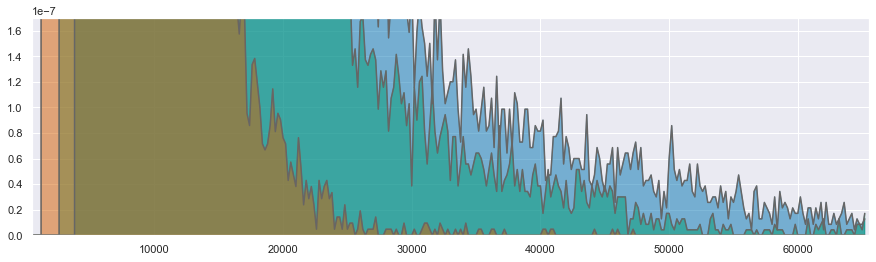

In [202]:
plt.rcParams['figure.figsize'] = (15,4)
thresh_imgs = cls
# thresh_imgs[thresh_imgs < 500] = 0
cls_hist = np.histogram(cls[:,:].flatten(), bins = np.arange(0,65500,200), density=True)
px_hist = np.histogram(px[:,:].flatten(), bins = np.arange(0,65500,200), density=True)
md_hist = np.histogram(md[:,:].flatten(), bins = np.arange(0,65500,200), density=True)
plt.plot(cls_hist[1][:-1], cls_hist[0], color=[0.4, 0.4, 0.4])
plt.plot(px_hist[1][:-1], px_hist[0], color=[0.4, 0.4, 0.4])
plt.plot(md_hist[1][:-1], md_hist[0], color=[0.4, 0.4, 0.4])
plt.fill_between(cls_hist[1][:-1], cls_hist[0], color=blue, alpha=0.5)
plt.fill_between(px_hist[1][:-1], px_hist[0], color=green, alpha=0.5)
plt.fill_between(md_hist[1][:-1], md_hist[0], color=orange, alpha=0.5)
# plt.show()
# plt.ylim([0, 0.5e4])
plt.ylim([0, 0.00000017])
plt.xlim([500, 2**16])
# plt.xlim([0, 200])
plt.rc('font', size=50)
# plt.xticks([0, 2**16])

(0.0, 5e-06)

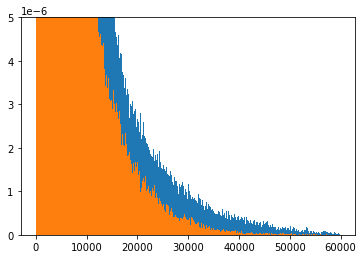

In [91]:
thresh_imgs = cls
# thresh_imgs[thresh_imgs < 500] = 0
a = plt.hist(cls[-2,-1,:,:].flatten(), bins = np.arange(0,60000,100), density=True)
a = plt.hist(px[-2,-1,:,:].flatten(), bins = np.arange(0,60000,100), density=True)
# plt.show()
# plt.ylim([0, 0.5e4])
plt.ylim([0, 0.5e-5])
# plt.xlim([0, 1e3])

<AxesSubplot:>

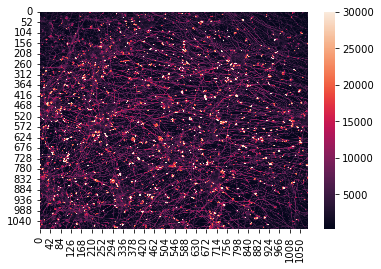

In [81]:
sns.heatmap(cls[-2,-1,:,:], vmax=3e4)